# Chapter 18: Reinforcement Learning

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make("CartPole-v1")
obs = env.reset()
obs

array([-0.03807   ,  0.03163771,  0.04257162,  0.03176088])

In [3]:
# gym.envs.registry.all()

In [4]:
env.render()

True

In [5]:
env.action_space

Discrete(2)

In [6]:
action = 1
obs, reward, done, info = env.step(action)
print(obs, reward, done, info)

[-0.03743725  0.22612412  0.04320684 -0.24719215] 1.0 False {}


In [7]:
env.render()

True

In [8]:
env.close()

In [9]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

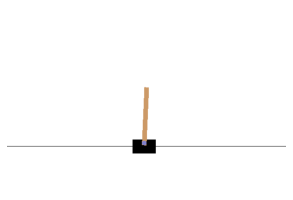

In [10]:
plot_environment(env);

# Hard-coded policy

In [11]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(5):
    episode_rewards = 0
    obs = env.reset()
    for step in range(2):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done: 
            break
    totals.append(episode_rewards)

In [12]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(2.0, 0.0, 2.0, 2.0)

In [13]:
env.close()

## NN Policy

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
n_inputs = 4

model = keras.models.Sequential([
    keras.layers.Dense(5, activation='elu', input_shape=[n_inputs]),
    keras.layers.Dense(1, activation='sigmoid')
])